In [4]:
import os
from os.path import join
import copy
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [5]:
data  = pd.read_csv("C:/Users/user/Downloads/BankChurners.csv (1)/BankChurners.csv")# 이부분만 데이터 있는 경로로 바꿔주시면 됩니다
#아 그리고 저는 원본 엑셀 데이터에서 끝에 나이브베이지안 컬럼을 지우고 시작한점 참고하세요!


In [6]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [7]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
data.shape

(10127, 21)

In [9]:
# data.info()

In [10]:
# Clientnum 	Num 	Client number. Unique identifier for the customer holding the account
# Attrition_Flag	char	Internal event (customer activity) variable - if the account is closed then 1 else 0
# Customer_Age  	Num 	Demographic variable - Customer's Age in Years
# Gender	Char	Demographic variable - M=Male, F=Female
# Dependent_count	Num 	Demographic variable - Number of dependents
# Education_Level	Char	Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
# Marital_Status	Char	Demographic variable - Married, Single, Unknown
# Income_Category	Char	Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
# Card_Category 	Char	Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
# Months_on_book	Num 	Months on book (Time of Relationship)
# Total_Relationship_Count	Num 	Total no. of products held by the customer
# Months_Inactive_12_mon	Num 	No. of months inactive in the last 12 months
# Contacts_Count_12_mon 	Num 	No. of Contacts in the last 12 months
# Credit_Limit  	Num 	Credit Limit on the Credit Card
# Total_Revolving_Bal	Num 	Total Revolving Balance on the Credit Card
# Avg_Open_To_Buy	Num 	Open to Buy Credit Line (Average of last 12 months)
# Total_Amt_Chng_Q4_Q1  	Num 	Change in Transaction Amount (Q4 over Q1) 
# Total_Trans_Amt	Num 	Total Transaction Amount (Last 12 months)
# Total_Trans_Ct	Num 	Total Transaction Count (Last 12 months)
# Total_Ct_Chng_Q4_Q1	Num 	Change in Transaction Count (Q4 over Q1) 
# Avg_Utilization_Ratio 	Num 	Average Card Utilization Ratio

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [12]:
#원핫인코딩 진행
data_ohe=pd.get_dummies(data, columns = ['Attrition_Flag','Gender','Marital_Status'], drop_first=True)
data_ohe

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,45,3,High School,$60K - $80K,Blue,39,5,1,3,...,1.335,1144,42,1.625,0.061,1,1,1,0,0
1,818770008,49,5,Graduate,Less than $40K,Blue,44,6,1,2,...,1.541,1291,33,3.714,0.105,1,0,0,1,0
2,713982108,51,3,Graduate,$80K - $120K,Blue,36,4,1,0,...,2.594,1887,20,2.333,0.000,1,1,1,0,0
3,769911858,40,4,High School,Less than $40K,Blue,34,3,4,1,...,1.405,1171,20,2.333,0.760,1,0,0,0,1
4,709106358,40,3,Uneducated,$60K - $80K,Blue,21,5,1,0,...,2.175,816,28,2.500,0.000,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,Graduate,$40K - $60K,Blue,40,3,2,3,...,0.703,15476,117,0.857,0.462,1,1,0,1,0
10123,710638233,41,2,Unknown,$40K - $60K,Blue,25,4,2,3,...,0.804,8764,69,0.683,0.511,0,1,0,0,0
10124,716506083,44,1,High School,Less than $40K,Blue,36,5,3,4,...,0.819,10291,60,0.818,0.000,0,0,1,0,0
10125,717406983,30,2,Graduate,$40K - $60K,Blue,36,4,3,3,...,0.535,8395,62,0.722,0.000,0,1,0,0,1


In [13]:
income_dic = {'Less than $40K' : 0, '$40K - $60K': 1, '$60K - $80K': 2,
              '$80K - $120K':3, '$120K +':4, 'Unknown': 0}
edu_dic = {'Uneducated':0, 'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,
          'Doctorate':5,'Unknown':0}
card_dic={'Blue':0,'Silver':1,'Gold':2,'Platinum':3}

In [14]:
data_ohe['new_income_category'] = data_ohe['Income_Category'].map(income_dic)
data_ohe['new_edu_category'] = data_ohe['Education_Level'].map(edu_dic)
data_ohe['new_card_category'] = data_ohe['Card_Category'].map(card_dic)

In [15]:
FD=data_ohe.drop('Education_Level',axis=1)
FD

,CLIENTNUM,Customer_Age,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,768805383,45,3,$60K - $80K,Blue,39,5,1,3,12691.0,...,1.625,0.061,1,1,1,0,0,2,1,0
1,818770008,49,5,Less than $40K,Blue,44,6,1,2,8256.0,...,3.714,0.105,1,0,0,1,0,0,3,0
2,713982108,51,3,$80K - $120K,Blue,36,4,1,0,3418.0,...,2.333,0.000,1,1,1,0,0,3,3,0
3,769911858,40,4,Less than $40K,Blue,34,3,4,1,3313.0,...,2.333,0.760,1,0,0,0,1,0,1,0
4,709106358,40,3,$60K - $80K,Blue,21,5,1,0,4716.0,...,2.500,0.000,1,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,$40K - $60K,Blue,40,3,2,3,4003.0,...,0.857,0.462,1,1,0,1,0,1,3,0
10123,710638233,41,2,$40K - $60K,Blue,25,4,2,3,4277.0,...,0.683,0.511,0,1,0,0,0,1,0,0
10124,716506083,44,1,Less than $40K,Blue,36,5,3,4,5409.0,...,0.818,0.000,0,0,1,0,0,0,1,0
10125,717406983,30,2,$40K - $60K,Blue,36,4,3,3,5281.0,...,0.722,0.000,0,1,0,0,1,1,3,0


In [16]:
FD1=FD.drop('Income_Category',axis=1)#,'Card_Category'
FD1

,CLIENTNUM,Customer_Age,Dependent_count,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,768805383,45,3,Blue,39,5,1,3,12691.0,777,...,1.625,0.061,1,1,1,0,0,2,1,0
1,818770008,49,5,Blue,44,6,1,2,8256.0,864,...,3.714,0.105,1,0,0,1,0,0,3,0
2,713982108,51,3,Blue,36,4,1,0,3418.0,0,...,2.333,0.000,1,1,1,0,0,3,3,0
3,769911858,40,4,Blue,34,3,4,1,3313.0,2517,...,2.333,0.760,1,0,0,0,1,0,1,0
4,709106358,40,3,Blue,21,5,1,0,4716.0,0,...,2.500,0.000,1,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,Blue,40,3,2,3,4003.0,1851,...,0.857,0.462,1,1,0,1,0,1,3,0
10123,710638233,41,2,Blue,25,4,2,3,4277.0,2186,...,0.683,0.511,0,1,0,0,0,1,0,0
10124,716506083,44,1,Blue,36,5,3,4,5409.0,0,...,0.818,0.000,0,0,1,0,0,0,1,0
10125,717406983,30,2,Blue,36,4,3,3,5281.0,0,...,0.722,0.000,0,1,0,0,1,1,3,0


In [17]:
FD2=FD1.drop('Card_Category',axis=1)
FD2

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,1.625,0.061,1,1,1,0,0,2,1,0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,3.714,0.105,1,0,0,1,0,0,3,0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,2.333,0.000,1,1,1,0,0,3,3,0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,2.333,0.760,1,0,0,0,1,0,1,0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,2.500,0.000,1,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,...,0.857,0.462,1,1,0,1,0,1,3,0
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,...,0.683,0.511,0,1,0,0,0,1,0,0
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,...,0.818,0.000,0,0,1,0,0,0,1,0
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,...,0.722,0.000,0,1,0,0,1,1,3,0


In [18]:
Final_clean_data=FD2.drop('CLIENTNUM',axis=1)
Final_clean_data #원핫인코딩 완료

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1.625,0.061,1,1,1,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,3.714,0.105,1,0,0,1,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,2.333,0.000,1,1,1,0,0,3,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,2.333,0.760,1,0,0,0,1,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,2.500,0.000,1,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0.857,0.462,1,1,0,1,0,1,3,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,0.683,0.511,0,1,0,0,0,1,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0.818,0.000,0,0,1,0,0,0,1,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,0.722,0.000,0,1,0,0,1,1,3,0


In [19]:
#특성(x)과 타겟(y)분리

In [20]:
Final_clean_data.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_Existing Customer', 'Gender_M',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')

In [21]:
y = Final_clean_data['Attrition_Flag_Existing Customer']
y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag_Existing Customer, Length: 10127, dtype: uint8

In [22]:
x = Final_clean_data[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category']]
x

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,42,1.625,0.061,1,1,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,33,3.714,0.105,0,0,1,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,20,2.333,0.000,1,1,0,0,3,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,20,2.333,0.760,0,0,0,1,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,28,2.500,0.000,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,117,0.857,0.462,1,0,1,0,1,3,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,69,0.683,0.511,1,0,0,0,1,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,60,0.818,0.000,0,1,0,0,0,1,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,62,0.722,0.000,1,0,0,1,1,3,0


In [23]:
x.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [25]:
x_train.shape

(7088, 21)

In [26]:
x_test.shape

(3039, 21)

In [27]:
y_test.shape

(3039,)

In [28]:
y_train.shape

(7088,)

In [29]:
# #pd.cut(X, bins, labels) 를 이용한 연속형 변수 'Customer age'의 여러개 구간별 범주화 
# bin = [20, 29, 39, 49, 59, 69, 79]
# group_names = ['20대', '30대', '40대', '50대', '60대', '70대']
# data['AgeGroup'] = pd.cut(data['Customer_Age'], bins=bin, labels=group_names)
# data['AgeGroup'].value_counts()

<AxesSubplot:>

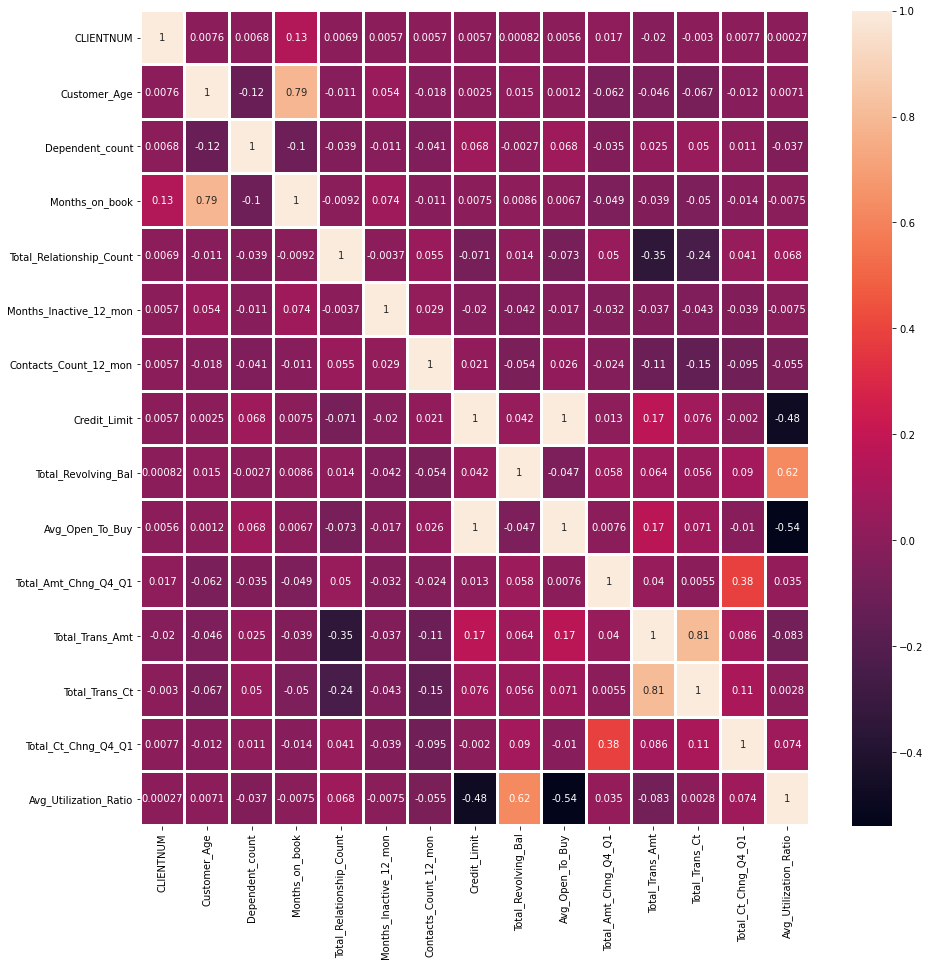

In [30]:
#heatmap
plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=2)

## 스케일링 전처리

In [31]:
# from sklearn.preprocessing import RobustScaler
# robustScaler = RobustScaler()
# print(robustScaler.fit(x_train))
# train_data_robustScaled = robustScaler.transform(x_train)
# plt.hist(train_data_robustScaled)

In [32]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler()
mms_train = mmscaler.fit(x_train)
mms_train_TF = mmscaler.transform(x_train)
mms_test_TF = mmscaler.transform(x_test)
# mms_scaled = pd.DataFrame(mms_finaldata_scaled,columns=Final_clean_data.columns)////여긴 저도 잘...
# mms_scaled

In [96]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
std_train = stdscaler.fit(x_train)
std_train_TF = stdscaler.transform(x_train)
std_test_TF = stdscaler.transform(x_test)
pd.DataFrame(std_train_TF, columns=x.columns).head()
# std_finaldata_scaled = pd.DataFrame(std_finaldata_scaled,columns=Final_clean_data.columns)
# std_finaldata_scaled

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,0.590415,0.499336,0.008496,1.401787,0.653327,0.497502,-0.552063,0.484704,-0.595402,-1.168422,...,-1.305017,-1.684022,0.567410,1.054532,-0.924931,1.248167,-0.284863,1.322379,0.843431,-0.258439
1,0.464796,1.271266,0.008496,-1.183827,-0.343397,0.497502,-0.675735,-1.422759,-0.549430,-1.421162,...,-0.921673,-1.354852,-0.995267,-0.948288,-0.924931,1.248167,-0.284863,-0.890675,-1.156204,-0.258439
2,-1.670722,-1.816452,0.008496,1.401787,-1.340121,0.497502,-0.647573,0.748607,-0.714428,3.182321,...,0.270952,1.082674,1.356017,-0.948288,-0.924931,1.248167,-0.284863,-0.890675,-1.156204,-0.258439
3,1.344127,-0.272593,0.512401,-0.537423,-0.343397,0.497502,0.386448,1.007600,0.296962,-0.649402,...,-1.305017,-0.388175,-0.406537,1.054532,1.081162,-0.801175,-0.284863,1.322379,0.843431,-0.258439
4,1.595365,-0.272593,2.150093,0.108980,2.646775,1.400755,-0.651503,1.550134,-0.789665,0.059174,...,-0.921673,-1.163183,2.264550,1.054532,-0.924931,1.248167,-0.284863,-0.152990,-1.156204,-0.258439


In [34]:
from sklearn.preprocessing import RobustScaler
robscaler = RobustScaler()
rob_train = robscaler.fit(x_train)
rob_train_TF = robscaler.transform(x_train)
rob_test_TF = stdscaler.transform(x_test)
# rob_finaldata_scaled = pd.DataFrame(rob_finaldata_scaled,columns=Final_clean_data.columns)
# rob_finaldata_scaled

In [35]:
from sklearn.preprocessing import Normalizer
norscaler = Normalizer()
nor_train = norscaler.fit(x_train)
nor_train_TF = norscaler.transform(x_train)
nor_test_TF = norscaler.transform(x_test)
# nor_finaldata_scaled = pd.DataFrame(nor_finaldata_scaled,columns=Final_clean_data.columns)
# nor_finaldata_scaled

In [36]:
from sklearn.preprocessing import MaxAbsScaler
mabscaler = MaxAbsScaler()
mab_train = mabscaler.fit(x_train)
mab_train_TF = mabscaler.transform(x_train)
mab_test_TF = mabscaler.transform(x_test)
# mab_finaldata_scaled = pd.DataFrame(mab_finaldata_scaled,columns=Final_clean_data.columns)
# mab_finaldata_scaled

In [37]:
#스케일링데이터로 x,y다시 분리 /mms_finaldata/std_finaldata/rob_finaldata/nor_finaldata/mab_finaldata--> 필요없는 코드인듯

In [38]:
# y1 = mms_finaldata_scaled['Attrition_Flag_Existing Customer']
# y1

In [39]:
# x1 = mms_finaldata_scaled[['Customer_Age', 'Dependent_count', 'Months_on_book',
#        'Total_Relationship_Count', 'Months_Inactive_12_mon',
#        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
#        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
#        'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
#        'Marital_Status_Married', 'Marital_Status_Single',
#        'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
#        'new_card_category']]
# x1

In [40]:
# x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [41]:
# x1_train.shape

In [42]:
#x1_test.shape

In [43]:
#y1_train.shape

In [44]:
#y1_test.shape

In [45]:
# import matplotlib
# import matplotlib.pyplot as plt
# import matplotlib.style as style
# style.use('ggplot')
# sns.set_style('whitegrid')
# plt.subplots(figsize = (30,30))
# ## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
# mask = np.zeros_like(x_train.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(x_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
# plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [46]:
#ML 패키지 로드
# !pip install imblearn
# !pip install delayed
# !pip install lightgbm

# from collections import Counter
# from imblearn.over_sampling import ADASYN
# from imblearn.over_sampling import SMOTE
# from lightgbm import LGBMClassifier
# from numpy import where
# from sklearn import metrics
# from sklearn import model_selection
# from sklearn import preprocessing
# from sklearn.datasets import make_classification
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
# from sklearn.ensemble.forest import ExtraTreesClassifier
# from sklearn.inspection import permutation_importance
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler, Normalizer
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBClassifier

In [47]:
# As observed, the number of churners is usually much smaller than the number of non-churners, 
# leading to an imbalanced training set. This issue was also present in our analysis, 
# we obsed the Churners rate is upto 16%, which might be NOT MUCH imbalanced. In particular, 
# the most effective method was undersampling, which outperformed the sampling techniques that replicates the rare class, 
# since the latter ones resulted in over-fitting the rare class, thus degrading the model performance significantly. 
# In particular, the undersampling technique significantly improved the results only if combined with the outlier removal. 
# The best proportion between classes was chosen so to optimize the classifier performance on the test set.

##  1.선형회귀모델

In [48]:
# 1. 인스턴스화 
from sklearn.linear_model import LinearRegression
m_lr = LinearRegression()

In [49]:
# 2. 적합화
# m_lr.fit(x_train, y_train)
m_lr.fit(mms_train_TF, y_train)

LinearRegression()

In [50]:
# y_pred=m_lr.predict(x_test)
# y_pred
y1_pred = m_lr.predict(mms_test_TF)
y1_pred

array([0.94317537, 0.58632681, 0.23637977, ..., 0.74018078, 1.12568599,
       0.82665648])

In [51]:
print(len(y1_pred))
print(len(mms_test_TF))

3039
3039


In [52]:
# 4. 평가
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
import math

#설명력 R2
print(r2(y_test,y1_pred))
#예측력 MSE
print(mse(y_test,y1_pred))
#회귀 분석에서는 좋은 결과를 얻지 못하는 중임

0.35117312178849536
0.08745763176359664


## 2.KNN 분류

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# k=3으로 인스턴스화 하라 n_neighbors=3
knn_classifier=KNeighborsClassifier(n_neighbors=7)

In [54]:
#knn_classifier.fit(x_train,y_train)
knn_classifier.fit(nor_train_TF,y_train)


KNeighborsClassifier(n_neighbors=7)

In [55]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score #성과지표는 거의 sklearn.metrics에 있음
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

In [56]:
# y_pred=knn_classifier.predict(x_test)
y1_pred=knn_classifier.predict(nor_test_TF)
print('정확도: ',accuracy_score(y_test, y1_pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y1_pred))
print('정밀도: ',precision_score(y_test, y1_pred))
print('f1점수: ',f1_score(y_test, y1_pred))


정확도:  0.8621256992431721
재현율:  0.9725597804782439
정밀도:  0.876678445229682
f1점수:  0.9221334324475005


In [57]:
import matplotlib.pyplot as plt

k_list = range(1,10)
acc = [] #정확도를 저장할 리스트 초기화

for k in k_list:
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(nor_train_TF, y_train)
  acc.append(knn_classifier.score(nor_test_TF, y_test))#계산된 정확도를 차례로 저장

In [58]:
acc[:10]

[0.8341559723593287,
 0.7956564659427443,
 0.857847976307996,
 0.8423823626192827,
 0.8614675880223758,
 0.8575189206975979,
 0.8621256992431721,
 0.8594932543599868,
 0.8585060875287923]

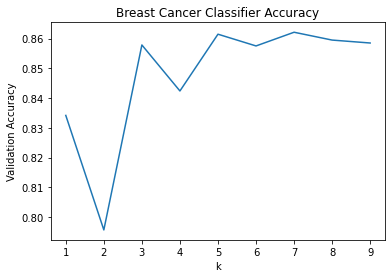

In [59]:
plt.plot(k_list, acc)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show() #그래프를 보면 0에서 20사이에 validation accuracy가 가장 높은 값을 선택할 수 있음
#여기선 6이 가장 높은 것으로 보임
#값이 예상과는 다르게 작은 것 같아 정규화를 진행한 후 knn 다시 진행
# minmax 스케일링 후 가장 높은 값을 보이는 것은 7에서 10사이에 있음(8로 추정)

In [60]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train,y_train)
y1_pred=knn_classifier.predict(x_test)
print('정확도: ',accuracy_score(y_test, y1_pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y1_pred))
print('정밀도: ',precision_score(y_test, y1_pred))
print('f1점수: ',f1_score(y_test, y1_pred))

정확도:  0.8986508719973676
재현율:  0.9592316738533908
정밀도:  0.923047906450396
f1점수:  0.9407920030757401


## 2-1knn 스케일링 없이 돌려보기

In [61]:
knn_classifier=KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [62]:
y1_pred=knn_classifier.predict(x_test)
print('정확도: ',accuracy_score(y_test, y1_pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y1_pred))
print('정밀도: ',precision_score(y_test, y1_pred))
print('f1점수: ',f1_score(y_test, y1_pred))

정확도:  0.8976637051661731
재현율:  0.9533516268130146
정밀도:  0.926829268292683
f1점수:  0.9399033816425121


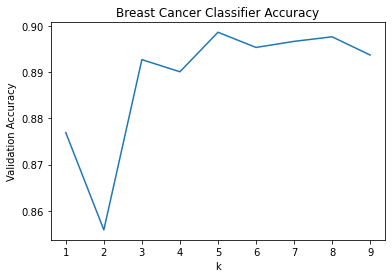

In [63]:
import matplotlib.pyplot as plt

k_list = range(1,10)
acc = [] #정확도를 저장할 리스트 초기화

for k in k_list:
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(x_train, y_train)
  acc.append(knn_classifier.score(x_test, y_test))#계산된 정확도를 차례로 저장
plt.plot(k_list, acc)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [64]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train,y_train)
y1_pred=knn_classifier.predict(x_test)
print('정확도: ',accuracy_score(y_test, y1_pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y1_pred))
print('정밀도: ',precision_score(y_test, y1_pred))
print('f1점수: ',f1_score(y_test, y1_pred)) #타겟 원소 1 은 계속 서비스를 이용하는 고객

정확도:  0.8986508719973676
재현율:  0.9592316738533908
정밀도:  0.923047906450396
f1점수:  0.9407920030757401


## PCA분석

In [93]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA() # 주성분을 몇개로 할지 결정
pca.fit(x_train)
#printcipalComponents = pca.fit_transform(x)

PCA()

In [100]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [101]:
d=np.argmax(cumsum>=0.95)+1

In [103]:
pca = PCA(n_components=0.95)
x_reduced=pca.fit_transform(x_train)

In [104]:
x_reduced

array([[-7529.28189511, -1788.39372319],
       [-8041.72229058, -1983.67040933],
       [-8863.29692753,  -625.66676305],
       ...,
       [37208.07283922, -4320.667593  ],
       [ 3684.78607668,  -540.46336421],
       [10156.89708973,  8943.79421698]])

In [105]:
principalDf = pd.DataFrame(data=x_reduced)

In [106]:
principalDf

,0,1
0,-7529.281895,-1788.393723
1,-8041.722291,-1983.670409
2,-8863.296928,-625.666763
3,4275.016490,-3166.519304
4,-9409.803736,-1289.177413
...,...,...
7083,18438.414032,-1193.818276
7084,-8783.278867,-1868.327655
7085,37208.072839,-4320.667593
7086,3684.786077,-540.463364


## 나이브베이즈

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [91]:
gnb=GaussianNB()

# 훈련셋으로 모델 훈련하라.(적합화)
gnb.fit(x_train, y_train)

# 테스트셋에 대한 모델 예측
y_pred=gnb.predict(x_test)

# 정확도를 측정하기 위힌 싸이킷런 모율 불러오기(import)
from sklearn.metrics import accuracy_score as acc

# 정확도를 프린트하라
print(acc(y_test, y_pred))
print('정확도: ',accuracy_score(y_test, y_pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y_pred))
print('정밀도: ',precision_score(y_test, y_pred))
print('f1점수: ',f1_score(y_test, y_pred))

0.8887792036854228
정확도:  0.8887792036854228
재현율:  0.9474715797726382
정밀도:  0.9221671117893934
f1점수:  0.9346481051817478


In [92]:
Mnb = MultinomialNB()

# 훈련셋으로 모델 훈련하라.(적합화)
Mnb.fit(x_train, y_train)

# 테스트셋에 대한 모델 예측
y_pred=Mnb.predict(x_test)

# 정확도를 측정하기 위힌 싸이킷런 모율 불러오기(import)
from sklearn.metrics import accuracy_score as acc

# 정확도를 프린트하라
#std,rob 스케일링 안됨
print(acc(y_test, y_pred))
print('정확도: ',accuracy_score(y_test, y_pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y_pred))
print('정밀도: ',precision_score(y_test, y_pred))
print('f1점수: ',f1_score(y_test, y_pred))

0.654820664692333
정확도:  0.654820664692333
재현율:  0.7079576636613093
정밀도:  0.8559241706161137
f1점수:  0.7749409997854537


## 3.랜덤포레스트

In [68]:
# 수강생 ver
# 트리 500개, 깊이 5의 랜덤 포레스트 분류기를 인스턴스화한다. n_estimators=500, max_depth=5를 이용하라
# minmax 스케일링 이후에는 오히려 결과값이 안좋아짐
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators=1000, max_depth=4,random_state=42) 
rt.fit(x_train, y_train)


# 모델 예측
y_pred=rt.predict(x_test)
y_proba=rt.predict_proba(x_test)
# 모델 평가
print('정확도: ',accuracy_score(y_test, y_pred))

columns = x_test.columns
print(columns)

# 특성 중요도  # columns = iris.feature_names임을 상기하라
feature_importance = pd.DataFrame(rt.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

정확도:  0.9019414281013491
Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.005795,0.001483,0.003112,0.056788,0.018833,0.026431,0.012599,0.162934,0.008214,0.035797,...,0.212223,0.176888,0.102557,0.005,0.000931,0.00041,0.000054,0.001148,0.00042,0.000638


<AxesSubplot:>

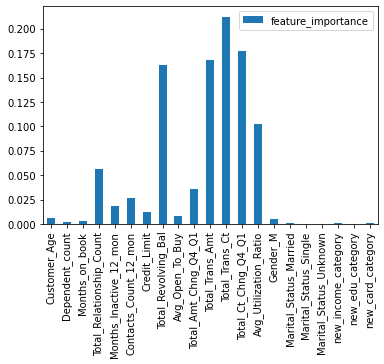

In [69]:
feature_importance.T.plot.bar()

In [70]:
# roc_auc를 계산하라 (곡선 아래 면적)
Q = rt.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, Q)
print(roc_auc)
print('정확도: ',accuracy_score(y_test, y_pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y_pred))
print('정밀도: ',precision_score(y_test, y_pred))
print('f1점수: ',f1_score(y_test, y_pred))


0.9425884095597354
정확도:  0.9019414281013491
재현율:  0.9890239121912975
정밀도:  0.9033297529538131
f1점수:  0.9442365269461078


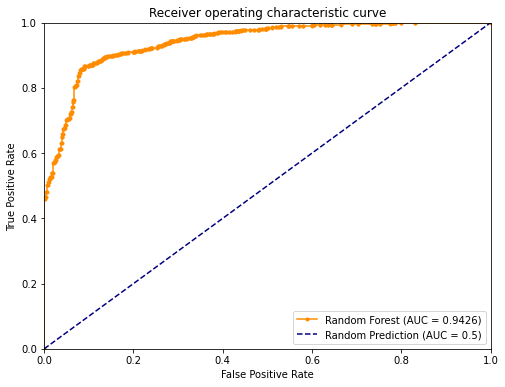

In [71]:
# ROC 곡선과 AUC의 계산
fpr, tpr, _ = roc_curve(y_test, Q)
# 그래프 그리기
plt.figure(figsize=(8,6))      # 그래프 크기 조정
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Random Forest (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show() #std,rob,nor,mab는 roc곡선이 엉망임 랜덤포레스트는 스케일링 안한것이 가장 결과가 좋음

In [72]:
#남은 일은 이제 모든 스케일링 데이터로 실험해보고 제일 좋은 것을 가져가는것

## 서포트벡터머신

In [73]:
from sklearn.svm import SVC

In [75]:
svc = SVC(C = 1.0, kernel = 'rbf')
svc.fit(x_train, y_train) 
y_svm_pred=svc.predict(x_test) #안돌아감. 뉴럴로 먼저

In [77]:
print('정확도: ',accuracy_score(y_test, y_svm_pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y_svm_pred))
print('정밀도: ',precision_score(y_test, y_svm_pred))
print('f1점수: ',f1_score(y_test, y_svm_pred))

정확도:  0.8394208621256992
재현율:  1.0
정밀도:  0.8394208621256992
f1점수:  0.9127012522361359


## 뉴럴 모델

In [69]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(solver='lbfgs')

In [70]:
mlp_regr = MLPRegressor(hidden_layer_sizes=(100, 2), activation='tanh', solver ='sgd', random_state=42)
mlp_regr.fit(x_train_over, y_train_over)
y_pred = mlp_regr.predict(x_test)
print('다중 MLP 회귀, RMSE : {:.4f}'.format(math.sqrt(mean_squared_error(y_test, y_pred))))

NameError: name 'x_train_over' is not defined

In [71]:
# mlp_regr = MLPRegressor(hidden_layer_sizes=[1024, 512, 4],max_iter=5000, alpha=0.005, random_state=42)
# mlp_regr.fit(x_train, y_train)
# y_pred = mlp_regr.predict(x_test)
# print('다중 MLP 회귀, RMSE : {:.4f}'.format(math.sqrt(mean_squared_error(y_test, y_pred))))

## 6. Gradient Boosting Classifier

In [72]:
#https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-15-Gradient-Boost
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(random_state=0,learning_rate=0.15,n_estimators=1000)

gbmodel.fit(x_train,y_train)
gbpredictions=gbmodel.predict(x_test)
print(classification_report(y_test,gbpredictions))

print('정확도: ',accuracy_score(y_test, gbpredictions))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, gbpredictions))
print('정밀도: ',precision_score(y_test, gbpredictions))
print('f1점수: ',f1_score(y_test, gbpredictions))#스케일링 필요없음 ㅇㅇ

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       496
           1       0.98      0.98      0.98      2543

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9677525501809806
재현율:  0.983484073928431
정밀도:  0.9780993351583888
f1점수:  0.9807843137254902


In [73]:
#참고 주소 https://www.kaggle.com/saky9596/churn-prediction-97-accuracy-90-recall

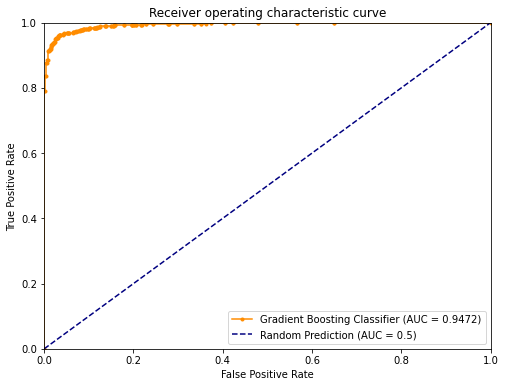

In [74]:
Q = gbmodel.predict_proba(x_test)[:,1]
# ROC 곡선과 AUC의 계산
fpr, tpr, _ = roc_curve(y_test, Q)
# 그래프 그리기
plt.figure(figsize=(8,6))      # 그래프 크기 조정
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Gradient Boosting Classifier (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show() #std,rob,nor,mab는 roc곡선이 엉망임 랜덤포레스트는 스케일링 안한것이 가장 결과가 좋음

## SMOTE 샘플링

In [78]:
!pip install imbalanced-learn

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
# 훈련 데이터만 오버샘플링
smote_over = SMOTE(k_neighbors=3, random_state = 2019)
x_train_over, y_train_over = smote_over.fit_resample(x_train, y_train)

In [81]:
#랜덤포레스트 진행
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators=1000, max_depth=4,random_state=42) 
rt.fit(x_train_over, y_train_over)


# 모델 예측
y_pred=rt.predict(x_test)
y_proba=rt.predict_proba(x_test)
# 모델 평가
print('정확도: ',accuracy_score(y_test, y_pred))

columns = x_test.columns
print(columns)

# 특성 중요도  # columns = iris.feature_names임을 상기하라
feature_importance = pd.DataFrame(rt.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

정확도:  0.8914116485686081
Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.003759,0.000964,0.001973,0.047839,0.019946,0.007561,0.009069,0.133182,0.010681,0.023277,...,0.259182,0.120582,0.085697,0.021236,0.024623,0.009994,0.001181,0.00129,0.001062,0.000151


In [82]:
# roc_auc를 계산하라 (곡선 아래 면적)
Q = rt.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, Q)
print(roc_auc)
print('정확도: ',accuracy_score(y_test, y_pred))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, y_pred))
print('정밀도: ',precision_score(y_test, y_pred))
print('f1점수: ',f1_score(y_test, y_pred))

0.9436326802089826
정확도:  0.8914116485686081
재현율:  0.9039592316738534
정밀도:  0.9644500209117524
f1점수:  0.9332254148118171


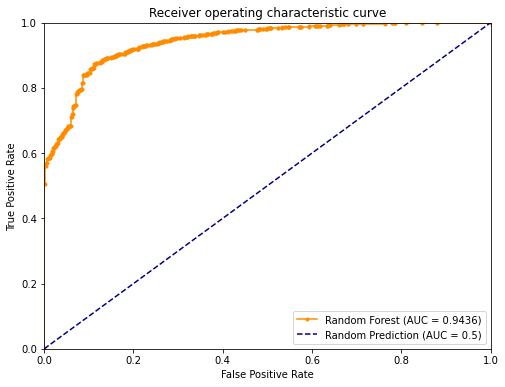

In [83]:
fpr, tpr, _ = roc_curve(y_test, Q)
# 그래프 그리기
plt.figure(figsize=(8,6))      # 그래프 크기 조정
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Random Forest (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(random_state=0,learning_rate=0.15,n_estimators=1000)

gbmodel.fit(x_train_over,y_train_over)
gbpredictions=gbmodel.predict(x_test)
print(classification_report(y_test,gbpredictions))

print('정확도: ',accuracy_score(y_test, gbpredictions))  #무조건 다수 클래스로 예측하는 경우 정확도
print('재현율: ',recall_score(y_test, gbpredictions))
print('정밀도: ',precision_score(y_test, gbpredictions))
print('f1점수: ',f1_score(y_test, gbpredictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       496
           1       0.99      0.98      0.98      2543

    accuracy                           0.97      3039
   macro avg       0.93      0.95      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9680816057913787
재현율:  0.9756193472276838
정밀도:  0.9860890302066773
f1점수:  0.9808262502470844


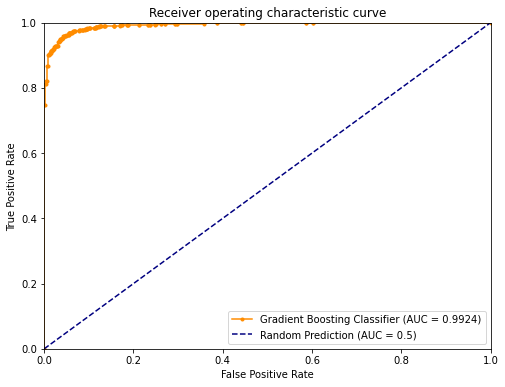

In [82]:
# ROC 곡선과 AUC의 계산
Q = gbmodel.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, Q)
fpr, tpr, _ = roc_curve(y_test, Q)
# 그래프 그리기
plt.figure(figsize=(8,6))      # 그래프 크기 조정
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Gradient Boosting Classifier (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show() #std,rob,nor,mab는 roc곡선이 엉망임 랜덤포레스트는 스케일링 안한것이 가장 결과가 좋음

## xgboost

In [108]:
!pip install xgboost

In [109]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings

In [110]:
dtrain = xgb.DMatrix(data=x_train, label = y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [111]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

In [112]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[10:19:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.62252	eval-logloss:0.62322
[1]	train-logloss:0.56452	eval-logloss:0.56644
[2]	train-logloss:0.51610	eval-logloss:0.51881
[3]	train-logloss:0.47815	eval-logloss:0.48247
[4]	train-logloss:0.44244	eval-logloss:0.44726
[5]	train-logloss:0.41421	eval-logloss:0.42047
[6]	train-logloss:0.38500	eval-logloss:0.39200
[7]	train-logloss:0.36108	eval-logloss:0.36860
[8]	train-logloss:0.34239	eval-logloss:0.35089
[9]	train-logloss:0.32301	eval-logloss:0.33178
[10]	train-logloss:0.30467	eval-logloss:0.31372
[11]	train-logloss:0.29131	eval-logloss:0.30129
[12]	train-logloss:0.27747	eval-logloss:0

[162]	train-logloss:0.05883	eval-logloss:0.09023
[163]	train-logloss:0.05859	eval-logloss:0.09015
[164]	train-logloss:0.05825	eval-logloss:0.08995
[165]	train-logloss:0.05814	eval-logloss:0.08986
[166]	train-logloss:0.05792	eval-logloss:0.08982
[167]	train-logloss:0.05780	eval-logloss:0.08977
[168]	train-logloss:0.05755	eval-logloss:0.08947
[169]	train-logloss:0.05732	eval-logloss:0.08939
[170]	train-logloss:0.05723	eval-logloss:0.08926
[171]	train-logloss:0.05689	eval-logloss:0.08902
[172]	train-logloss:0.05668	eval-logloss:0.08895
[173]	train-logloss:0.05656	eval-logloss:0.08889
[174]	train-logloss:0.05647	eval-logloss:0.08890
[175]	train-logloss:0.05620	eval-logloss:0.08859
[176]	train-logloss:0.05582	eval-logloss:0.08822
[177]	train-logloss:0.05568	eval-logloss:0.08814
[178]	train-logloss:0.05531	eval-logloss:0.08796
[179]	train-logloss:0.05505	eval-logloss:0.08793
[180]	train-logloss:0.05489	eval-logloss:0.08780
[181]	train-logloss:0.05477	eval-logloss:0.08777
[182]	train-logloss:

[330]	train-logloss:0.03393	eval-logloss:0.07912
[331]	train-logloss:0.03380	eval-logloss:0.07914
[332]	train-logloss:0.03367	eval-logloss:0.07912
[333]	train-logloss:0.03355	eval-logloss:0.07899
[334]	train-logloss:0.03342	eval-logloss:0.07903
[335]	train-logloss:0.03331	eval-logloss:0.07896
[336]	train-logloss:0.03324	eval-logloss:0.07898
[337]	train-logloss:0.03315	eval-logloss:0.07892
[338]	train-logloss:0.03312	eval-logloss:0.07887
[339]	train-logloss:0.03300	eval-logloss:0.07884
[340]	train-logloss:0.03292	eval-logloss:0.07883
[341]	train-logloss:0.03275	eval-logloss:0.07886
[342]	train-logloss:0.03270	eval-logloss:0.07885
[343]	train-logloss:0.03260	eval-logloss:0.07880
[344]	train-logloss:0.03251	eval-logloss:0.07883
[345]	train-logloss:0.03239	eval-logloss:0.07876
[346]	train-logloss:0.03220	eval-logloss:0.07865
[347]	train-logloss:0.03208	eval-logloss:0.07857
[348]	train-logloss:0.03203	eval-logloss:0.07864
[349]	train-logloss:0.03194	eval-logloss:0.07858
[350]	train-logloss:

In [115]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[1.    0.966 0.007 0.999 0.003 1.    0.169 0.845 0.946 1.   ]
예측값 10개만 표시:  [1, 1, 0, 1, 0, 1, 0, 1, 1, 1]


In [116]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [117]:
get_clf_eval(y_test, y_pred)

오차행렬:
 [[ 184  304]
 [ 745 1806]]

정확도: 0.6548
정밀도: 0.8559
재현율: 0.7080
F1: 0.7749
AUC: 0.5425


In [ ]:
# lightgbm
# catboost